In [17]:
import pandas as pd
from warnings import simplefilter; simplefilter(action="ignore", category=pd.errors.PerformanceWarning)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

import sys
sys.path.append("../boa-learn")

from src.load import load_fhs

In [10]:
# "frmgham2.csv": https://gen3.biodatacatalyst.nhlbi.nih.gov/files/dg.4503/9c277b3d-3fab-401e-b1dd-d2e6c7991cbc
# data dic here: https://biolincc.nhlbi.nih.gov/media/teachingstudies/FHS_Teaching_Longitudinal_Data_Documentation_2021a.pdf?link_time=2022-04-18_09:29:24.200176

In [18]:
# read table
df=load_fhs()

<Axes: xlabel='timeline'>

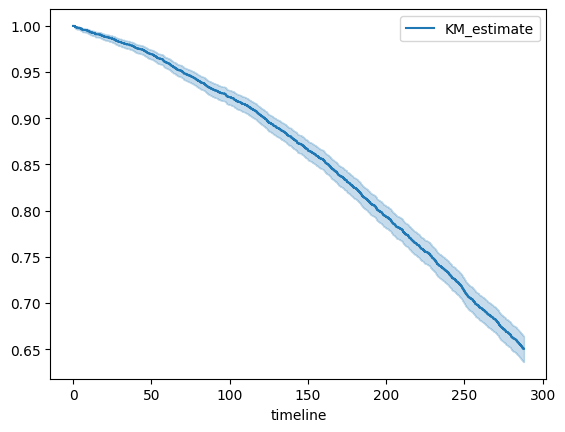

In [20]:
T = df['months_until_death']
E = df['is_dead']
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)  # or, more succinctly, kmf.fit(T, E)
kmf.survival_function_
kmf.cumulative_density_
kmf.plot_survival_function()

Text(0, 0.5, 'Survival ratio')

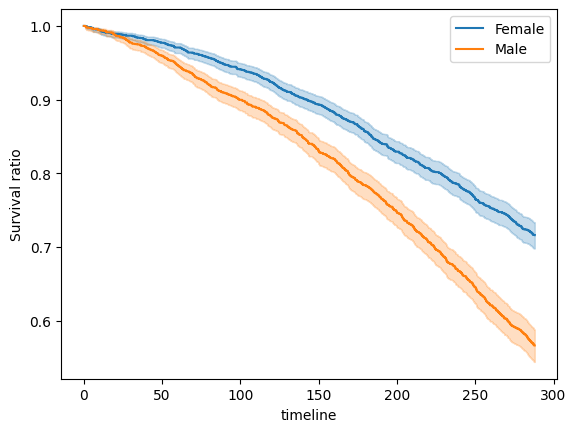

In [21]:
groups = df['sex']
ix = (groups == 2)

kmf.fit(T[ix], E[ix], label='Female')
ax = kmf.plot_survival_function()

kmf.fit(T[~ix], E[~ix], label='Male')
ax = kmf.plot_survival_function(ax=ax)
ax.set_ylabel('Survival ratio')

In [23]:
Gluc_median=df['glucose'].median()

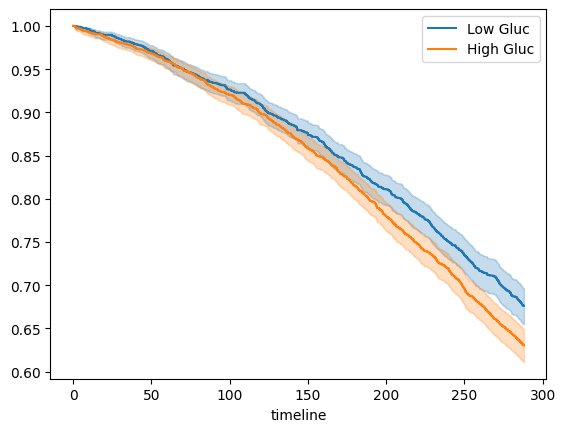

In [24]:
ax=plt.subplot()
groups = df['glucose']
ix = (groups < Gluc_median)
kmf.fit(T[ix], E[ix], label='Low Gluc')
ax = kmf.plot_survival_function(ax=ax)
kmf.fit(T[~ix], E[~ix], label='High Gluc')
ax = kmf.plot_survival_function()

In [25]:
year=2010
df.to_csv(f'fhs-{year}.csv')